# Assignment-1, Feature cleaning and data cleaning

Abstract-

In this assignment, we will use a dataset for predictive learning and check the quality of the data and determine which features are important.

About Dataset-

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

#Classifying dependent and independent variables The dependent variable in the dataset is DiabetesPedigreeFunction and the predictor variables in the dataset are Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,OUTCOME



I have installed opendatasets above just to retrive the data from kaggle ,


In [10]:
!pip install opendatasets

In [11]:
import opendatasets as od

In [12]:
dataset='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'

In [13]:
import opendatasets as od

In [ ]:
import os

In [ ]:
od.download(dataset)

In [7]:
data_dir='./diabetes-dataset'

In [8]:
os.listdir(data_dir)

['diabetes.csv']

Importing different libraries below so that I can perform cleaning and feature selection.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
data = pd.read_csv('./diabetes-dataset/diabetes.csv')

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From above we get to know that out of 9 variables in dataset 7 are int type and 2 are float type

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome are integer variable 
but BMI and DiabeticPedigreeFunction are float type.

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From above we come to know there is no null values in the above dataset.

0    500
1    268
Name: Outcome, dtype: int64

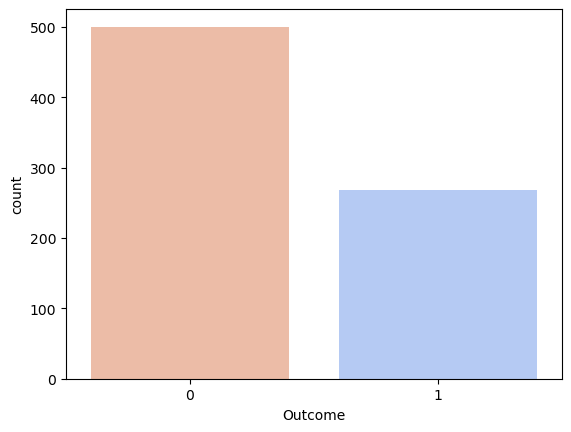

In [15]:
# checking total number of diabetic in dataset
sns.countplot(x='Outcome', data=data, palette='coolwarm_r')
data['Outcome'].value_counts()

Here above we get to know total diabetic patients from dataset are 268 and non diabetic people equivalent to 500.

In [16]:
#changing our Main prediction (dependent) variable "Outcome" from Bool to Int type for detailed Statistical results
data['Outcome'] = data['Outcome'].astype('int64')

We are switching categorial dependent variable boolean value to integer in above code snippet.

In [17]:
#To get statistical results like count, mean, std, quartiles and many more from the dataset
#we use the descsribe() function.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From data.describe() we get mean valu,std deviation,min,max values

In [ ]:
#Checking the distribution of Independent variables
field_names = data[[
    'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
]]

for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(data[column])
    plt.show()

<Axes: >

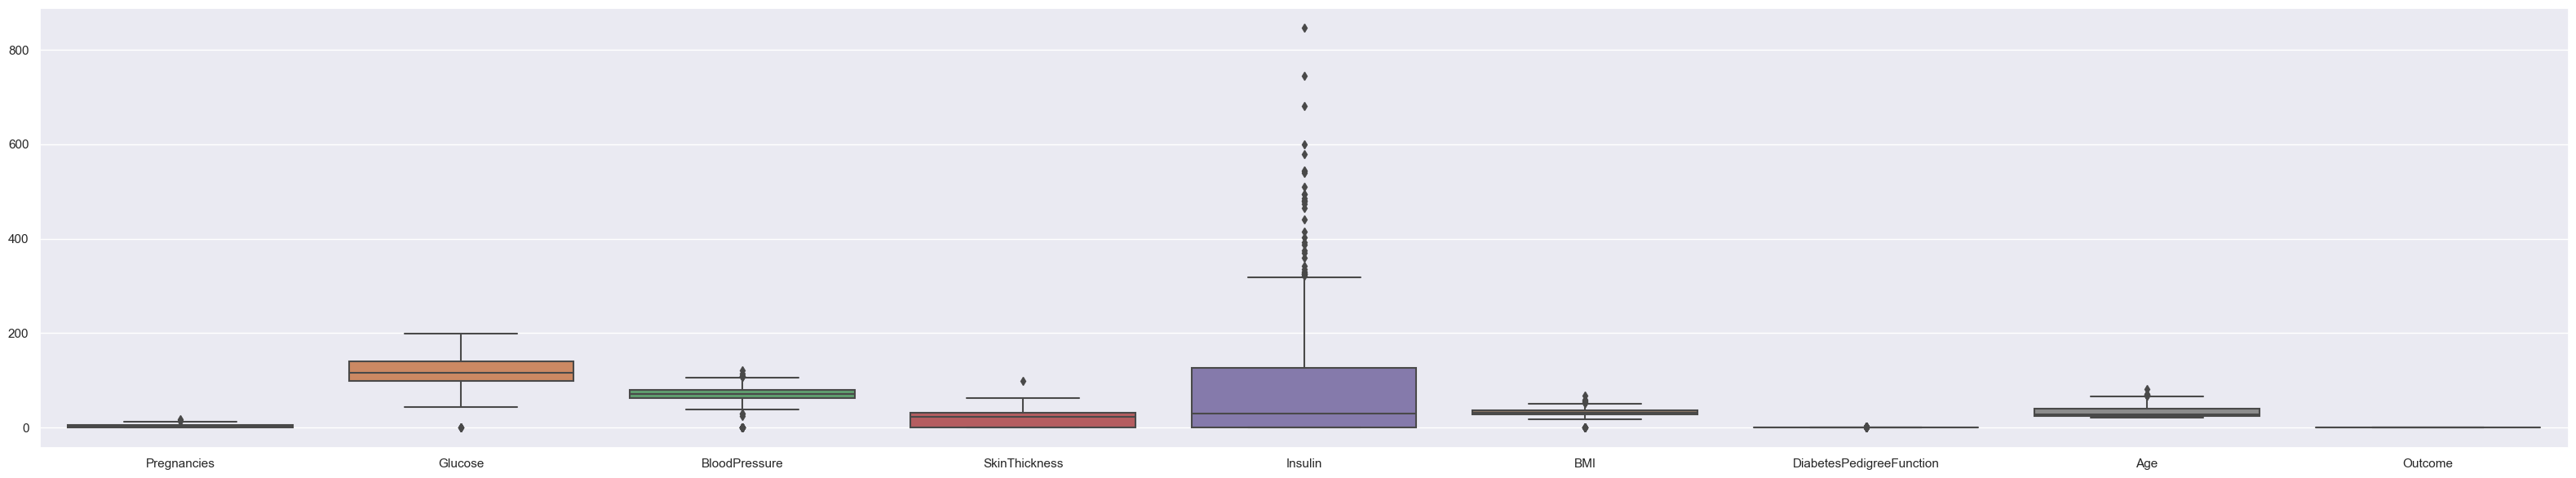

In [19]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,7))
sns.boxplot(data=data)

here we are getting range of predictor variables in form of quartiles.

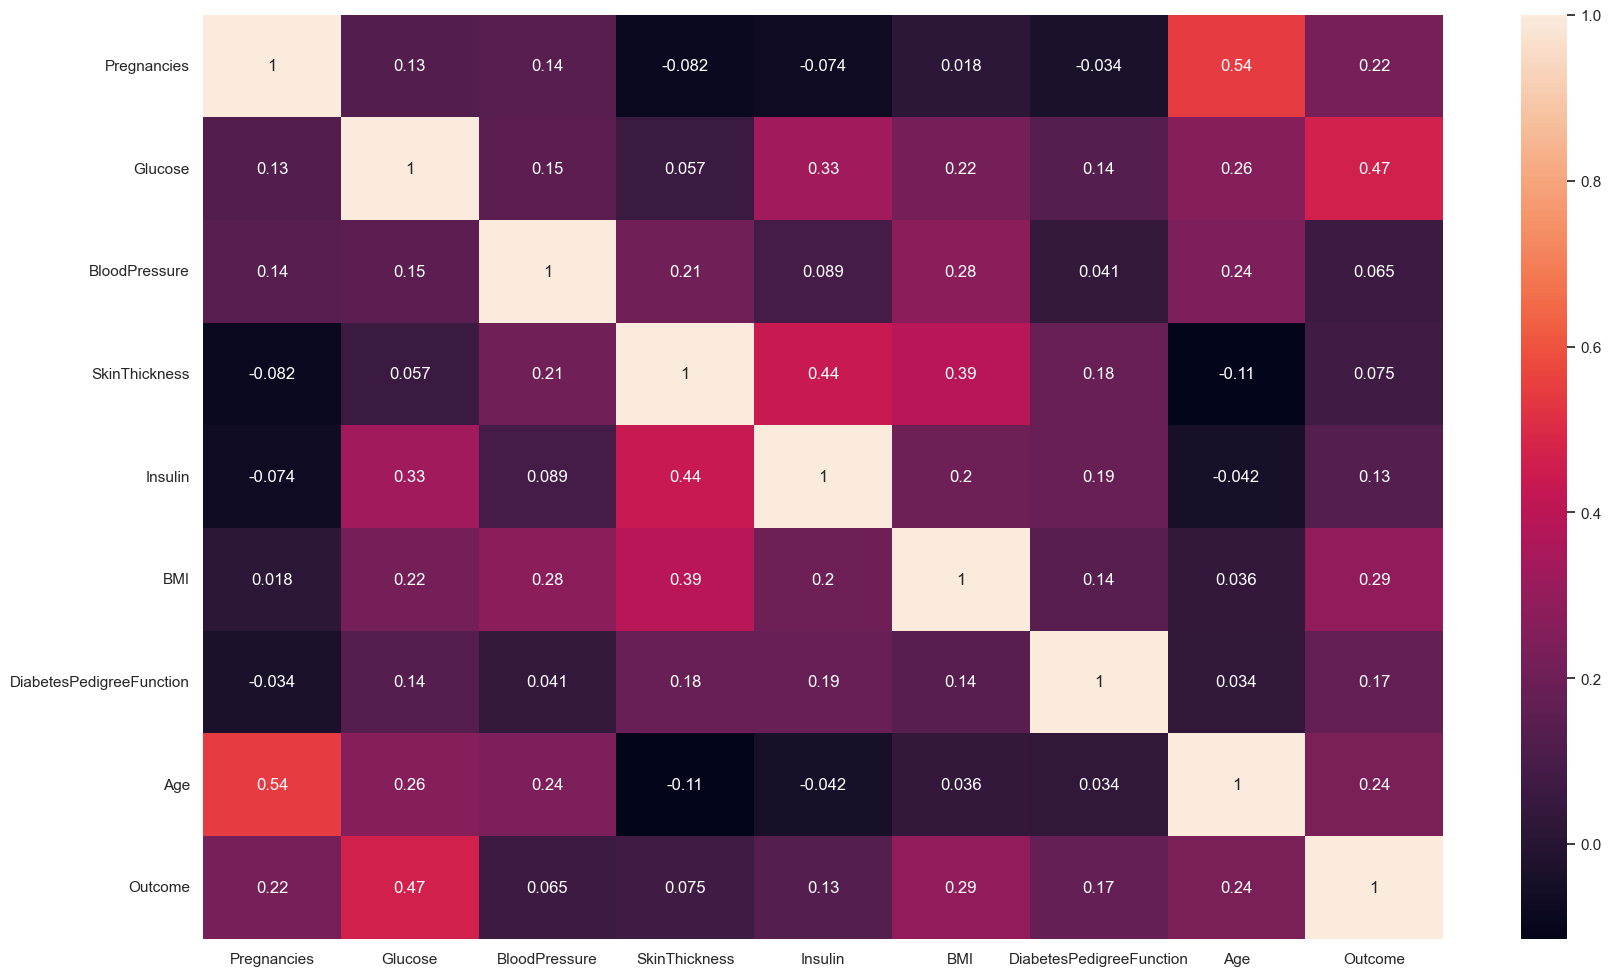

In [20]:
# Check colinearity among data columns
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

Representation of correlation in variables as per dependent variable in order to check the dependency of dependent variable to predictor variables.

In [21]:
# Dependency correlation with smoking column
data.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

here glucose is the most important feature but bloodpressure is the least important one as per the correlations.

In [22]:
columns_to_drop = [
    
   'BloodPressure',
    'SkinThickness',
    
]
data_with_corr = data.drop(columns_to_drop, axis=1)
data_with_corr.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


we are dropping bloodpressure and skin thickness here as these are least impotant variables for predicting outcome.

In [23]:
data_with_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier(random_state=42)

# First we make dummy data from original data
dummy_data_v2 = pd.get_dummies(data, columns=['DiabetesPedigreeFunction', 'Insulin'])


# Make Testing and Training Data
X = dummy_data_v2.drop(['Outcome'], axis=1)
y = dummy_data_v2['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=42)
# Make copy of this Test Data
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

f1_score_list = []

for k in range(1, 20):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v1, y_train_v1)
    
    sel_X_train_v1 = selector.transform(X_train_v1)
    sel_X_test_v1 = selector.transform(X_test_v1)
    
    dt.fit(sel_X_train_v1, y_train_v1)
    kbest_preds = dt.predict(sel_X_test_v1)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)
  
print(f1_score_list)

[0.641, 0.653, 0.691, 0.714, 0.7, 0.701, 0.71, 0.684, 0.693, 0.682, 0.701, 0.701, 0.701, 0.713, 0.688, 0.695, 0.695, 0.707, 0.713]


in above we have applied chi square test as well as f1_score test in order to find most and least important features which is second method to find out the dependency.

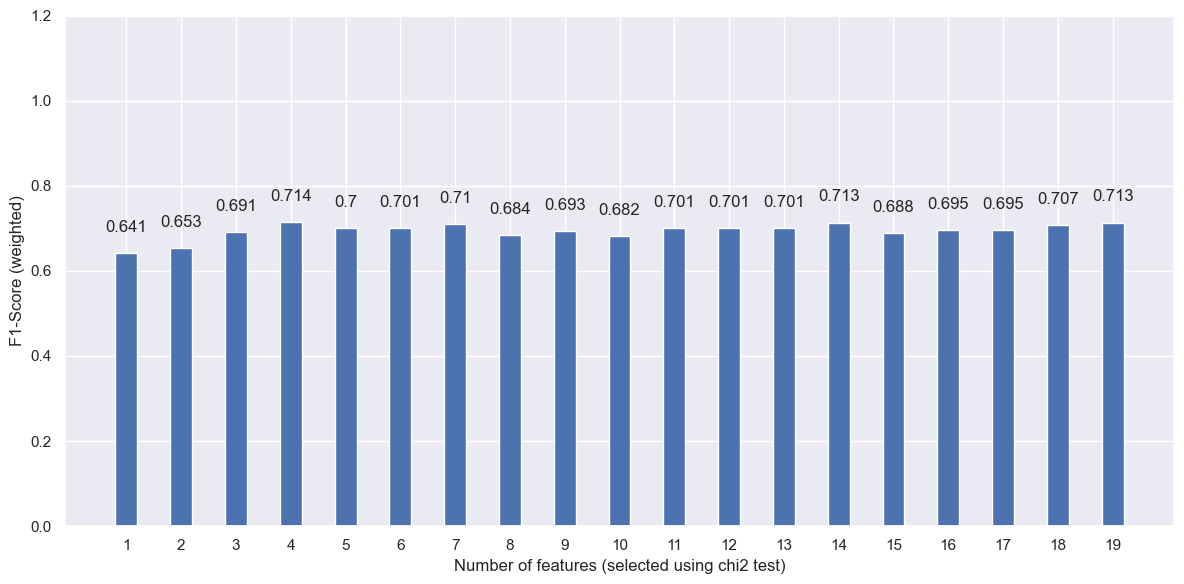

In [25]:
# We can now plot the F1-score for each number of variables used in the model:
fig, ax = plt.subplots(figsize=(12, 6))
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13', '14', '15', '16', '17', '18', '19']
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features (selected using chi2 test)')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

Above we are plotting chi square test chart for number of features involved in the findings of final prediction/result

In [26]:
X_new = dummy_data_v2.drop(['Outcome'], axis=1)
Y_new = dummy_data_v2['Outcome']

# Create and fit selector
selector = SelectKBest(f_classif, k=4)
selector.fit(X_new, Y_new)

# Now selector will take the best featured columns
cols = selector.get_support(indices=True)
new_feature_data = X_new.iloc[:,cols]
print(new_feature_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BMI          768 non-null    float64
 3   Age          768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB
None


After this above dummy drop and chi square test we get the best features involved in predicting the final outcome.

In [27]:
new_feature_data['Outcome'] = Y_new
new_feature_data.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


## Implementation of logistic regression to find best features in this classified dataset.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

X_v2 = dummy_data_v2.drop(['Outcome'], axis=1)
y_v2 = dummy_data_v2[['Outcome']]
y_v2 = y_v2.values.ravel()

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_v2)
X_test = scaler.transform(X_test_v2)

In [29]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [33]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Outcome'], data[['Pregnancies', 'Glucose', 'BMI']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              212.8
Date:                Fri, 08 Dec 2023   Prob (F-statistic):                   2.32e-100
Time:                        17:52:48   Log-Likelihood:                         -452.44
No. Observations:                 768   AIC:                                      910.9
Df Residuals:                     765   BIC:                                      924.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Pregnancies     0.0169      0.005      3.615      0.000       0.008       0.026
Glucose         0.0030      0.000      7.125      0.000       0.002       0.004
BMI            -0.0016      0.002     -1.014      0.311      -0.005       0.001
==============================================================================
Omnibus:                    21003.378   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.017
Skew:                           0.605   Prob(JB):                     5.78e-24
Kurtosis:                       1.628   Cond. No.                         38.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In above we will get r2 as well as p value to check significant value of best predictive feature.

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
X_dummy_data = dummy_data_v2[['Pregnancies', 'Glucose', 'BMI']]
y_dummy_data = dummy_data_v2[['Outcome']]
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_dummy_data, y_dummy_data, test_size=0.2, random_state=42, stratify=y_dummy_data)
logisticRegr.fit(X_train_data, y_train_data)
threshold = 0.5
logisticRegr.predict(X_test_data)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

Now after various sorting and cleaning features above we will now be working with 3 predictive as well as dependent variables.

In [36]:
s1= logisticRegr.predict(X_test_data)

In [37]:
# Finding Root mean square error to check how much chances of error are there in our model
rms = mean_squared_error(y_test_v2, s1, squared=False)
rms

0.5405624776173353

In [38]:
#Checking the accuracy of our model with outliers
logisticRegr.score(X_test_data, y_test_data)

0.7077922077922078

Through the logistic regresiion we will get accuracy upto 70% which is good accuracy.

In [39]:
# Now we create confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_v2, s1)
print(conf_matrix)

[[79 21]
 [24 30]]


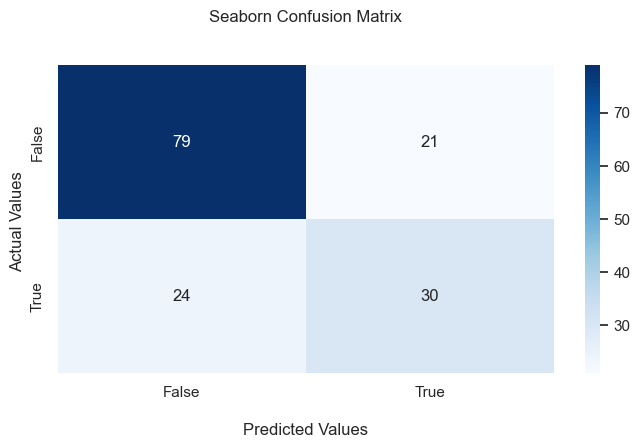

In [40]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The above representaion in seaborn chart is the representation of confusion matrix before applying any kind of outliers ,so that after applying it we will observe again the confusion matrix and we will get to know about the changes occured in dataset with outlier.

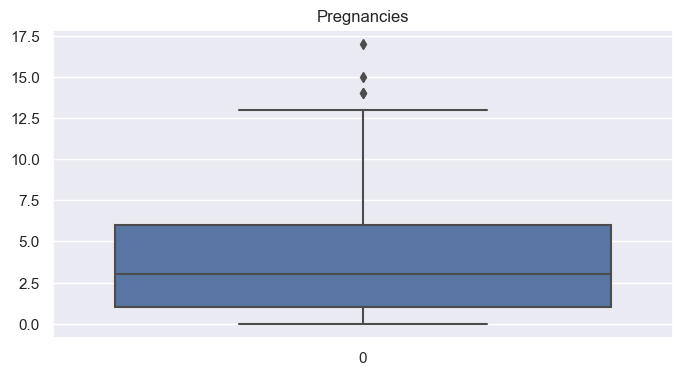

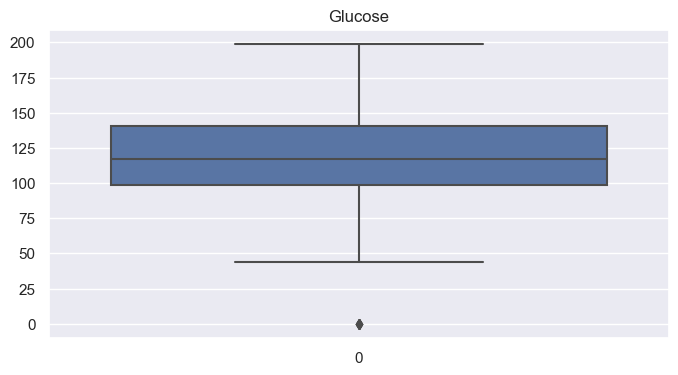

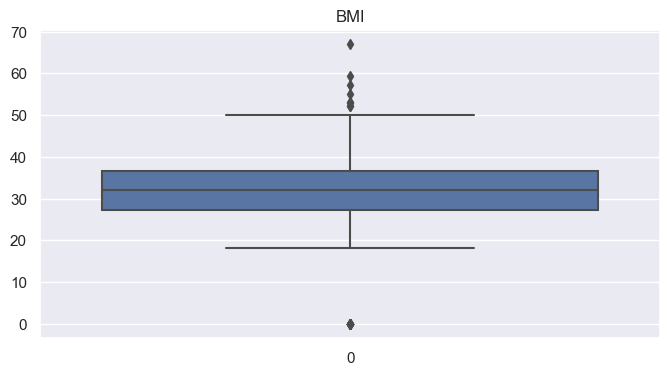

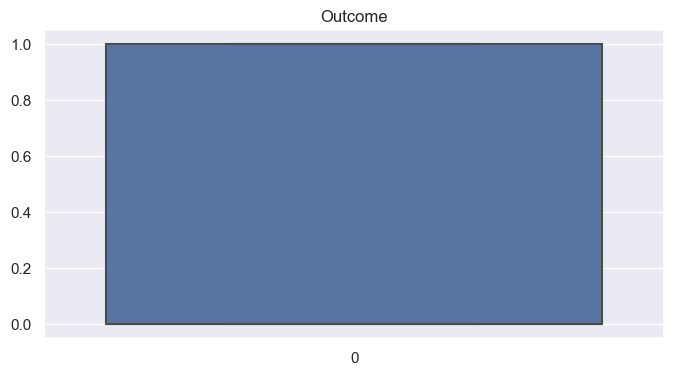

In [41]:
# First we make boxplot of the features we selected to predict the outliers and remove if any
featured_dataset = dummy_data_v2[['Pregnancies','Glucose', 'BMI','Outcome']]
fields = featured_dataset.columns
for column in fields:
    sns.boxplot(data=featured_dataset[column])
    plt.title(column)
    plt.show()

We are using above code snippet to check the quartile range and any outlier if occur in alreacy present dataset.

In [45]:
"""
Normalizing the data in outcome,pregnancies,glucose and bmi
beacuse the value is too high when compared to other independent variable
"""

from sklearn import preprocessing

# Create x to store scaled values as floats
x = featured_dataset[['Outcome', 'Pregnancies','Glucose','BMI']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
featured_dataset[['Outcome', 'Pregnancies','Glucose','BMI']] = pd.DataFrame(x_scaled)

<Axes: >

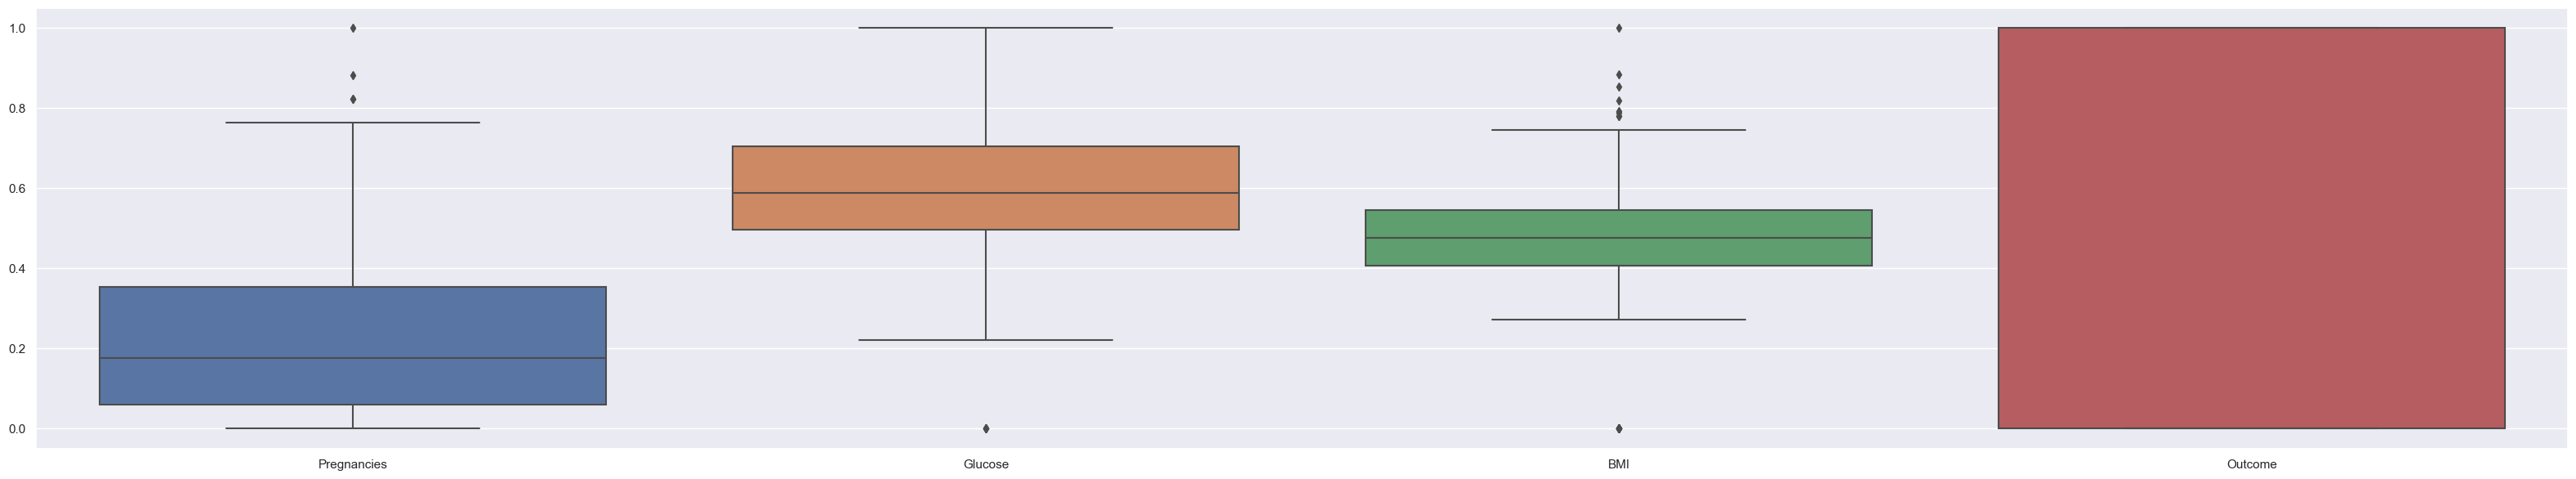

In [46]:
plt.figure(figsize=(40,7))
sns.boxplot(data=featured_dataset)

From above we get the range of all the most important predicted variable in form of quartile chart representation.

## Application of outliers in order to check and recheck any sort of value change.

In [48]:
dataset_a = data.copy()

# Selecting 1% of data from height column
dataset_a_1_perc = dataset_a['Glucose'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['Glucose'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in outcome row 
dataset_a['Glucose'].isnull().sum()

8

After applying outlier and remoiving just 1% data we get 8 values in the dataset of glucose to be missing.

In [49]:
# Now we will be using Mean Imputation method to replace Null values
dataset_a['Glucose'] = dataset_a['Glucose'].fillna(dataset_a['Glucose'].mean())
dataset_a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0
764,2,122.0,70,27,0,36.8,0.340,27,0
765,5,121.0,72,23,112,26.2,0.245,30,0
766,1,126.0,60,0,0,30.1,0.349,47,1


In [50]:
#checking recovery after mean imputation in column 
dataset_a.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
#Now we detect the outliers and separate them
# We will be using Inter Quartile Range method to detect outliers

# First we calculate 25 and 75 percentile for both columns
total_diabetic_25_perc = featured_dataset['Outcome'].quantile(0.25)
total_diabetic_75_perc = featured_dataset['Outcome'].quantile(0.75)
total_diabetic_iqr = total_diabetic_75_perc - total_diabetic_25_perc

# Now we find the upper and lower limit
total_diabetic_limit_upper_perc = total_diabetic_75_perc + 1.5 * total_diabetic_iqr
total_diabetic_limit_lower_perc = total_diabetic_25_perc - 1.5 * total_diabetic_iqr

# Finding outliers
new_dataset = featured_dataset[featured_dataset['Outcome'] < total_diabetic_limit_upper_perc]
new_dataset = new_dataset[new_dataset['Outcome'] > total_diabetic_limit_lower_perc]

Above 25 and 75 percent method is one of the good methods to detect outliers.

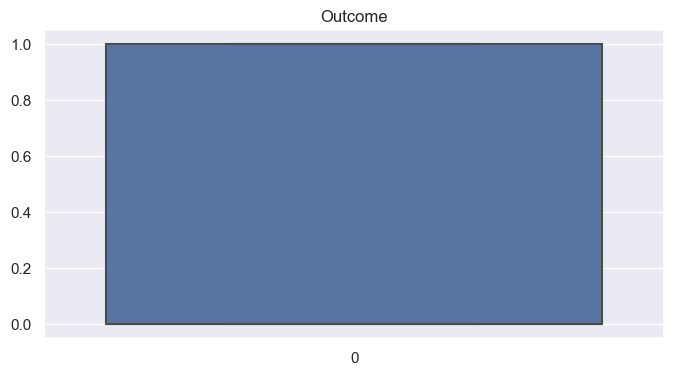

In [52]:
# Now we box plot the features with no outliers
featured_dataset_no_outliers = new_dataset[['Outcome']]
fields_no_outliers = featured_dataset_no_outliers.columns
for column in fields_no_outliers:
    sns.boxplot(data=featured_dataset_no_outliers[column])
    plt.title(column)
    plt.show()

In [54]:
# Now we apply Logistic Regression on our new dataset without Outliers
logisticRegrNoOutliers = LogisticRegression()

y_no_outlier_data = new_dataset[['Outcome']]
X_train_no_outlier_data, X_test_no_outlier_data, y_train_no_outlier_data, y_test_no_outlier_data = train_test_split(featured_dataset_no_outliers, y_no_outlier_data, test_size=0.2, random_state=42, stratify=y_no_outlier_data)
logisticRegrNoOutliers.fit(X_train_no_outlier_data, y_train_no_outlier_data)
threshold = 0.5
logisticRegrNoOutliers.predict(X_test_no_outlier_data)

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0.])

Applying above logistic regression approach again on outlier data to find out any change so far in the predictions.

In [55]:
s2= logisticRegrNoOutliers.predict(X_test_no_outlier_data)

In [56]:
# now we find Root Mean Square error for our new dataset with no outliers
rms = mean_squared_error(y_test_no_outlier_data, s2, squared=False)
rms

0.0

In [57]:
# Now we find our score for new dataset with no outliers
logisticRegrNoOutliers.score(X_test_no_outlier_data, y_test_no_outlier_data)

1.0

In [58]:
# Now we create confusion matrix for feature dataset with no outliers
from sklearn.metrics import confusion_matrix

conf_matrix_no_outliers = confusion_matrix(y_test_no_outlier_data, s2)
print(conf_matrix_no_outliers)

[[100   0]
 [  0  54]]


Observe above carefully and we get to know that due to the outliers just on 1% of the predictions we get different value of confusion matrix as compared to the first reading of complete data withou any cahnge.

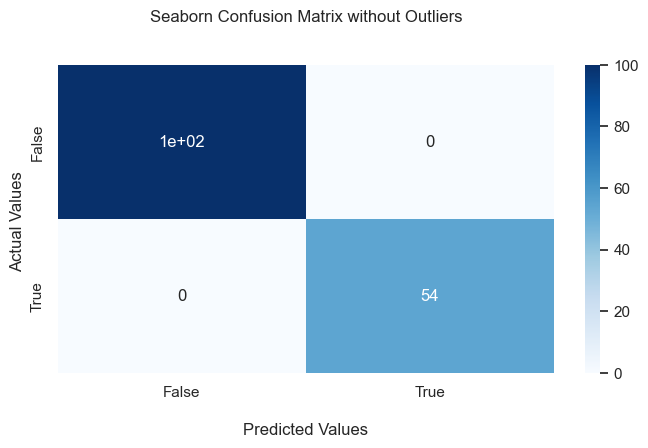

In [59]:
axes = sns.heatmap(conf_matrix_no_outliers, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix without Outliers\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Below we have applied 1%,5%,10% removal of random data and observing the variance,bias and loss.

In [60]:
dataset_a = data.copy()

# Selecting 1% of data from Total day minutes column
dataset_a_1_perc = dataset_a['Outcome'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['Outcome'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in Income row 
dataset_a['Outcome'].isnull().sum()

8

In [61]:
# Now we will be using Mean Imputation method to replace Null values
dataset_a['Outcome'] = dataset_a['Outcome'].fillna(dataset_a['Outcome'].mean())
dataset_a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0.0
764,2,122,70,27,0,36.8,0.340,27,0.0
765,5,121,72,23,112,26.2,0.245,30,0.0
766,1,126,60,0,0,30.1,0.349,47,1.0


In [62]:
# # Checking Bias and Variance for 1% imputed data by mean
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

Expected loss: 0.455
Bias: 70.130
Variance: 0.000


In [64]:
dataset_b = data.copy()

# Selecting 1% of data from smoking column
dataset_b_1_perc = dataset_b['Outcome'].sample(frac=0.05)
# Replacing selected column values by NaN
dataset_b['Outcome'].loc[dataset_b.index.isin(dataset_b_1_perc.index)]=np.NaN

#Count of null values in Income row 
dataset_b['Outcome'].isnull().sum()

38

In [65]:
dataset_b['Outcome'] = dataset_b['Outcome'].fillna(dataset_b['Outcome'].median())
dataset_b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0.0
764,2,122,70,27,0,36.8,0.340,27,0.0
765,5,121,72,23,112,26.2,0.245,30,0.0
766,1,126,60,0,0,30.1,0.349,47,1.0


In [66]:
# Checking Bias and Variance for 5% imputed data by median

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

Expected loss: 0.455
Bias: 70.130
Variance: 0.000


In [ ]:
# Checking Bias and Variance for 10% imputed data by mode

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

From above snippets we get bias,variance and loss value similar for 1%,5%,10% value reduce.

## Question and their Answers,

##Answer the following questions:
1)What are the data types? (Only numeric and categorical)
Answer-0   Pregnancies               768 non-null    int64  
       1   Glucose                   768 non-null    int64  
       2   BloodPressure             768 non-null    int64  
       3   SkinThickness             768 non-null    int64  
       4   Insulin                   768 non-null    int64  
       5   BMI                       768 non-null    float64
       6   DiabetesPedigreeFunction  768 non-null    float64
       7   Age                       768 non-null    int64  
       8   Outcome                   768 non-null    int64 
       
Here outcome is categorial value but      pregnancies,glucose,bloodpressure,skinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age are numeric 

2)Are there missing values?
Answer-Pregnancies          0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0

There is no missing value in the whole dataset.

3)What are the likely distributions of the numeric variables?
Answer-This question is answered above using 
#Checking the distribution of Independent variables

field_names = data[[
    'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
]]

for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(data[column])
    plt.show()
    
   in cell number 18 where we are getting all the variables with normal distribution bell shaped curve. 

4)Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
Answer-1)Using correlation,We get Glucose,BMI,Age as the most useful to predict a target,
       2)Using logistic regression we get Pregnancies,Glusose and BMI as most important features for predicting             target.
       3)Using normalising data we get Pregnancies,glucose and BMI as most important features to detect the target .
       
5)Which independent variables have missing data? How much?
Answer-Earlier while importing data from kaggle we got no missing value in the dataset but while applying 1% randomly imputing test we get 8 missing values.

6)Do the training and test sets have the same data?
Answer)Training and testing sets have different values as we have seperated the testing and training test in ratio of 2:8 but the datset used is same. 

7)In the predictor variables independent of all the other predictor variables?
Answer)BloodPressure is the predictor variable independent of all the variables ,we get that by applying correlation test .

8)Which predictor variables are the most important?
Answer)Most impotant predictor variables are pregnancies,glucose and BMI.

9)Do the ranges of the predictor variables make sense?
Answer)Range of pregnancies makes sense while implementing the above code.

10)What are the distributions of the predictor variables?
Answer)We get normal distribution for all the predictor variables in form of bell curve.

11)Remove outliers and keep outliers (does if have an effect of the final predictive model)?
Answer)After removing outlier in final predictive model we will get different confusion matrix value.

12)Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
Answer)After removing 1%,5% and 10% data  randomly and imputing values back we will get same values for bias 
,variance and error that is

Expected loss: 0.455
Bias: 70.130
Variance: 0.000


## Conclusion

In above dataset we have applied various tests such as confusion matrix,logistic regresiion,chi square in order to find out the most important features which we get pregnancies,glucos and BMI for detecting the dependent variables and after that used some outliers on imporatnt features in order to check any sort of changes in predictions which we get though.

## License

MIT License
Copyright (c) 2023 Sanat Popli
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## References

1)https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6
3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/
5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html
6)https://www.datacamp.com/community/tutorials/xgboost-in-python
7)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb